In [2]:
import numpy as np
import pandas as pd
from pandas import Series
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
conn = sqlite3.connect('teams_game_log.db')

df_team = pd.read_sql_query('SELECT * FROM teamslog', conn)
df_team.tail()

,id,Team_ID,Game_ID,GAME_DATE,MATCHUP,WL,W,L,W_PCT,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
13805,13805,1610612747,0021900074,"NOV 01, 2019",LAL @ DAL,W,4.0,1.0,0.800,265,...,0.762,6,35,41,24,11,7,11,21,119
13806,13806,1610612747,0021900054,"OCT 29, 2019",LAL vs. MEM,W,3.0,1.0,0.750,240,...,0.846,10,44,54,25,9,8,18,19,120
13807,13807,1610612747,0021900040,"OCT 27, 2019",LAL vs. CHA,W,2.0,1.0,0.667,240,...,0.786,10,37,47,30,7,8,13,22,120
13808,13808,1610612747,0021900025,"OCT 25, 2019",LAL vs. UTA,W,1.0,1.0,0.500,240,...,0.792,11,31,42,19,14,9,14,21,95
13809,13809,1610612747,0021900002,"OCT 22, 2019",LAL @ LAC,L,0.0,1.0,0.000,240,...,0.714,9,32,41,20,4,7,14,24,102


In [4]:
conn = sqlite3.connect('teams_game_log.db')

df_team = pd.read_sql_query('SELECT * FROM teamslog', conn)
df_team.tail()

,id,Team_ID,Game_ID,GAME_DATE,MATCHUP,WL,W,L,W_PCT,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
13805,13805,1610612747,0021900074,"NOV 01, 2019",LAL @ DAL,W,4.0,1.0,0.800,265,...,0.762,6,35,41,24,11,7,11,21,119
13806,13806,1610612747,0021900054,"OCT 29, 2019",LAL vs. MEM,W,3.0,1.0,0.750,240,...,0.846,10,44,54,25,9,8,18,19,120
13807,13807,1610612747,0021900040,"OCT 27, 2019",LAL vs. CHA,W,2.0,1.0,0.667,240,...,0.786,10,37,47,30,7,8,13,22,120
13808,13808,1610612747,0021900025,"OCT 25, 2019",LAL vs. UTA,W,1.0,1.0,0.500,240,...,0.792,11,31,42,19,14,9,14,21,95
13809,13809,1610612747,0021900002,"OCT 22, 2019",LAL @ LAC,L,0.0,1.0,0.000,240,...,0.714,9,32,41,20,4,7,14,24,102


In [5]:
conn = sqlite3.connect('players_game_log.db')

df_player = pd.read_sql_query('SELECT * FROM playerslog', conn)
df_player.head()

,id,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,0,22013,203506,0021301227,"APR 16, 2014",ORL vs. IND,L,17,2,8,...,2,2,1,1,0,2,2,4,-7,1
1,1,22013,203506,0021301208,"APR 14, 2014",ORL @ CHI,L,23,3,8,...,3,3,4,1,0,3,1,10,3,1
2,2,22013,203506,0021301199,"APR 13, 2014",ORL @ BKN,L,26,5,8,...,2,2,1,2,0,6,2,14,-13,1
3,3,22013,203506,0021301176,"APR 11, 2014",ORL vs. WAS,L,16,3,5,...,2,2,1,2,0,3,5,6,-9,1
4,4,22013,203506,0021301163,"APR 09, 2014",ORL vs. BKN,W,19,4,8,...,3,3,6,1,0,3,0,9,14,1


In [6]:
df_combined = pd.merge(df_team, df_player, on='Game_ID')
df_combined.shape

(23846, 55)

In [7]:
df_combined = df_combined.drop_duplicates(subset=['Game_ID'])
df_combined.columns

Index(['id_x', 'Team_ID', 'Game_ID', 'GAME_DATE_x', 'MATCHUP_x', 'WL_x', 'W',
       'L', 'W_PCT', 'MIN_x', 'FGM_x', 'FGA_x', 'FG_PCT_x', 'FG3M_x', 'FG3A_x',
       'FG3_PCT_x', 'FTM_x', 'FTA_x', 'FT_PCT_x', 'OREB_x', 'DREB_x', 'REB_x',
       'AST_x', 'STL_x', 'BLK_x', 'TOV_x', 'PF_x', 'PTS_x', 'id_y',
       'SEASON_ID', 'Player_ID', 'GAME_DATE_y', 'MATCHUP_y', 'WL_y', 'MIN_y',
       'FGM_y', 'FGA_y', 'FG_PCT_y', 'FG3M_y', 'FG3A_y', 'FG3_PCT_y', 'FTM_y',
       'FTA_y', 'FT_PCT_y', 'OREB_y', 'DREB_y', 'REB_y', 'AST_y', 'STL_y',
       'BLK_y', 'TOV_y', 'PF_y', 'PTS_y', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [8]:
df = df_combined[['PTS_y', 'PTS_x','PLUS_MINUS', 'Game_ID', 'Player_ID']]

In [9]:
df = df.rename(columns={'PTS_y': 'PLAYER_PTS',
                        'PTS_x': 'TEAM_PTS'})
df.head()

,PLAYER_PTS,TEAM_PTS,PLUS_MINUS,Game_ID,Player_ID
0,4,86,-7,0021301227,203506
2,10,95,3,0021301208,203506
6,14,88,-13,0021301199,203506
7,6,86,-9,0021301176,203506
8,9,115,14,0021301163,203506


In [10]:
print(df.shape)
print(df.info())

(8062, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8062 entries, 0 to 23845
Data columns (total 5 columns):
PLAYER_PTS    8062 non-null int64
TEAM_PTS      8062 non-null int64
PLUS_MINUS    8062 non-null int64
Game_ID       8062 non-null object
Player_ID     8062 non-null int64
dtypes: int64(4), object(1)
memory usage: 377.9+ KB
None


TS% = (PTS/2(FGA + (0.44 x FTA))) * 100

where:

PTS = points scored,
FGA = field goal attempts,
FTA = free throw attempts 

In [11]:
df.corr()['TEAM_PTS']

PLAYER_PTS    0.261579
TEAM_PTS      1.000000
PLUS_MINUS    0.433376
Player_ID     0.085182
Name: TEAM_PTS, dtype: float64

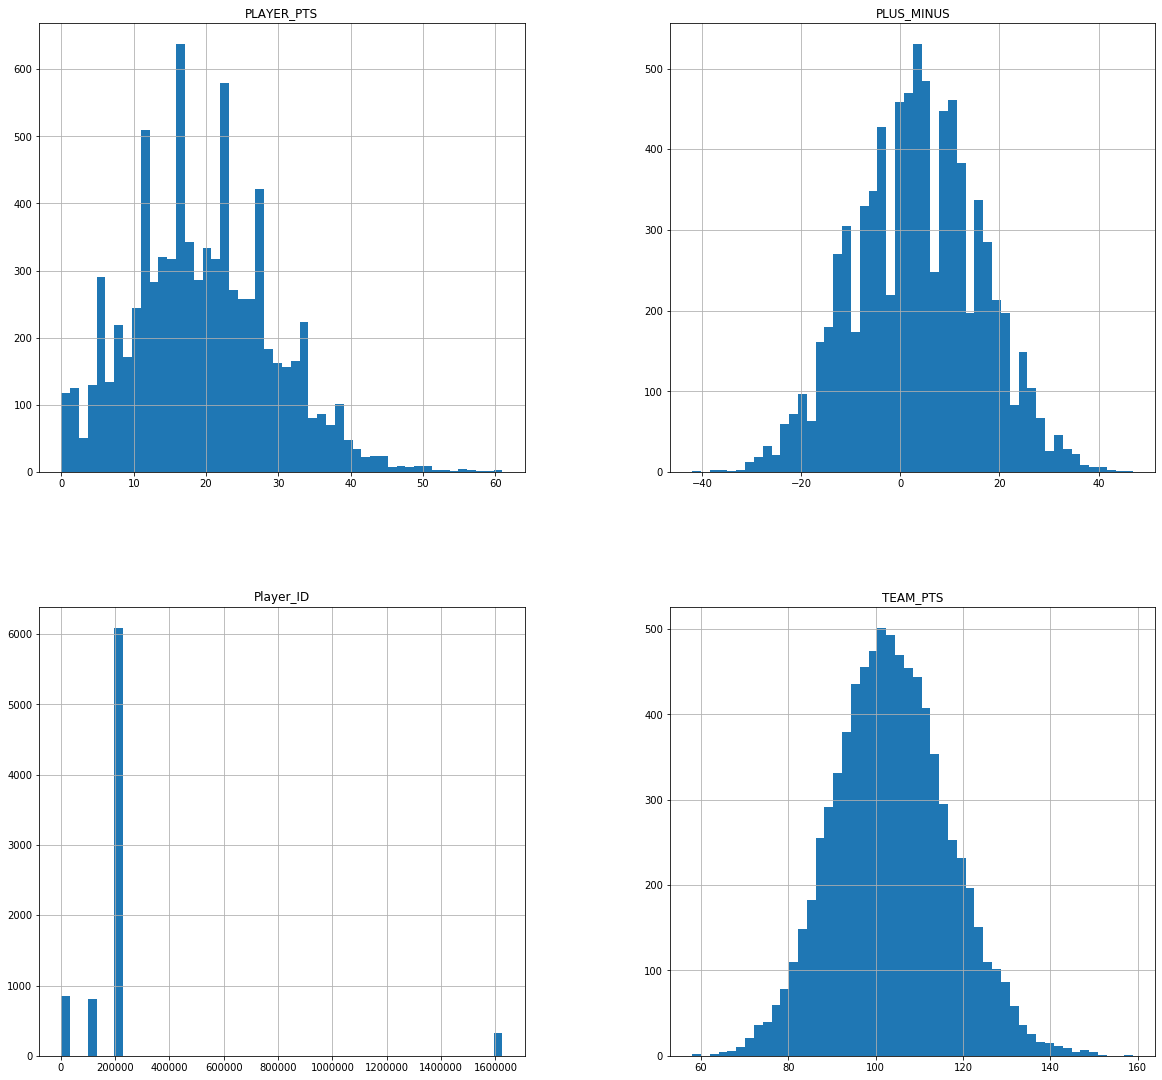

In [12]:
df.hist(bins=50, figsize=(20, 19))
plt.show()

In [13]:
#                0        1
# 0          VictorOladipo   203506
# 1      Karl-AnthonyTowns  1626157
# 2            NikolaJokic   203999
# 3            KyrieIrving   202681
# 4              AlHorford   201143
# 5          DamianLillard   203081
# 6             RudyGobert   203497
# 7          DraymondGreen   203110
# 8           KawhiLeonard   202695
# 9             PaulGeorge   202331
# 10           JimmyButler   202710
# 11            JoelEmbiid   203954
# 12             ChrisPaul   101108
# 13      RussellWestbrook   201566
# 14  GiannisAntetokounmpo   203507
# 15          AnthonyDavis   203076
# 16           JamesHarden   201935
# 17          StephenCurry   201939
# 18           KevinDurant   201142
# 19           LeBronJames     2544

In [14]:
oladip_df = df.loc[df['Player_ID']==203506]
towns_df = df.loc[df['Player_ID']==1626157]
jokic_df = df.loc[df['Player_ID']==203999]
irving_df = df.loc[df['Player_ID']==202681]
horford_df = df.loc[df['Player_ID']==201143]
lillard_df = df.loc[df['Player_ID']==203081]
gobert_df = df.loc[df['Player_ID']==203497]
green_df = df.loc[df['Player_ID']==203110]
leonard_df = df.loc[df['Player_ID']==202695]
george_df = df.loc[df['Player_ID']==202331]
butler_df = df.loc[df['Player_ID']==202710]
embiid_df = df.loc[df['Player_ID']==203954]
paul_df = df.loc[df['Player_ID']==101108]
westbrook_df = df.loc[df['Player_ID']==201566]
antetokounmpo_df = df.loc[df['Player_ID']==203507]
davis_df = df.loc[df['Player_ID']==203076]
harden_df = df.loc[df['Player_ID']==201935]
curry_df = df.loc[df['Player_ID']==201939]
durant_df = df.loc[df['Player_ID']==201142]
james_df = df.loc[df['Player_ID']==2544]

In [15]:
col_id = ['Player_ID', 'Game_ID']
oladip_df.drop(col_id, axis=1, inplace=True)
towns_df.drop(col_id, axis=1, inplace=True)
jokic_df.drop(col_id, axis=1, inplace=True)
irving_df.drop(col_id, axis=1, inplace=True)
horford_df.drop(col_id, axis=1, inplace=True)
lillard_df.drop(col_id, axis=1, inplace=True)
gobert_df.drop(col_id, axis=1, inplace=True)
green_df.drop(col_id, axis=1, inplace=True)
leonard_df.drop(col_id, axis=1, inplace=True)
george_df.drop(col_id, axis=1, inplace=True)
butler_df.drop(col_id, axis=1, inplace=True)
embiid_df.drop(col_id, axis=1, inplace=True)
paul_df.drop(col_id, axis=1, inplace=True)
westbrook_df.drop(col_id, axis=1, inplace=True)
antetokounmpo_df.drop(col_id, axis=1, inplace=True)
davis_df.drop(col_id, axis=1, inplace=True)
harden_df.drop(col_id, axis=1, inplace=True)
curry_df.drop(col_id, axis=1, inplace=True)
durant_df.drop(col_id, axis=1, inplace=True)
james_df.drop(col_id, axis=1, inplace=True)

C:\Users\ktung\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.externals import joblib

C:\Users\ktung\Anaconda3\envs\PythonData\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [54]:
y = np.array(antetokounmpo_df['TEAM_PTS']).astype(int)
X = antetokounmpo_df.drop('TEAM_PTS', 1)

df = (X.mean(axis=0), X.std(axis=0))
df = pd.DataFrame(list(df))
df = df.rename(index={0: 'X mean',
               1: 'X std'})
df = df.rename(columns={0: 'PLAYER_PTS',
                       1: 'PLUS_MINUS'})

GiannisAntetokounmpo_team_stat = df
print(GiannisAntetokounmpo_team_stat)
GiannisAntetokounmpo_team_stat.to_pickle("team_stat/GiannisAntetokounmpo_team_stat")




        PLAYER_PTS  PLUS_MINUS
X mean   18.895385    2.504615
X std     9.991423   11.946543


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# print(X_train.mean(axis=0), X_train.std(axis=0))
# print(y_train.shape)

In [442]:
player_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

X_train = player_pipeline.fit_transform(X_train)
X_test = player_pipeline.transform(X_test)

In [444]:
#                0        1
# 0          VictorOladipo_team_stat   203506
# 1      Karl_AnthonyTowns_team_stat  1626157
# 2            NikolaJokic_team_stat   203999
# 3            KyrieIrving_team_stat   202681
# 4              AlHorford_team_stat   201143
# 5          DamianLillard_team_stat   203081
# 6             RudyGobert_team_stat   203497
# 7          DraymondGreen_team_stat   203110
# 8           KawhiLeonard_team_stat   202695
# 9             PaulGeorge_team_stat   202331
# 10           JimmyButler_team_stat   202710
# 11            JoelEmbiid_team_stat   203954
# 12             ChrisPaul_team_stat   101108
# 13      RussellWestbrook_team_stat   201566
# 14  GiannisAntetokounmpo_team_stat   203507
# 15          AnthonyDavis_team_stat   203076
# 16           JamesHarden_team_stat   201935
# 17          StephenCurry_team_stat   201939
# 18           KevinDurant_team_stat   201142
# 19           LeBronJames_team_stat     2544

In [445]:
df = (X_train.mean(axis=0), X_train.std(axis=0))
df = pd.DataFrame(list(df))
df = df.rename(index={0: 'X_train mean',
               1: 'X_train std'})
df = df.rename(columns={0: 'PLAYER_PTS',
                       1: 'PLUS_MINUS'})
LeBronJames_team_stat = df.rename(columns={0: 'stat'})
LeBronJames_team_stat.to_pickle("team_stat/LeBronJames_team_stat")

In [446]:
def plot_learning_curves(model, X, y):
    if (model == 'lin_reg'):
        model = LinearRegression()
    if(model == 'svm_reg'):
        model = LinearSVR(random_state=42)
    if (model == 'tree_reg'):
        model = DecisionTreeRegressor()
    if (model == 'forest_reg'):
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, 10):#len(X_train)):
        
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
#         print(pd.Series(y_train_predict - y_train[:m]))
#         print(pd.DataFrame({'predict':y_train_predict, 'actual': y_train[:m]}))
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    return train_errors, val_errors

In [447]:
lin_reg = LinearRegression()
svm_reg = LinearSVR(random_state=42)
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
mlp_reg = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=42, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)

In [448]:
named_estimators = [
    ('Linear_Regression', lin_reg),
    ('SVM', svm_reg),
    ('Decision_Tree', tree_reg),
    ('Random_Forest', forest_reg),
    ('MLP Regressor', mlp_reg)
]

In [449]:
estimators = [lin_reg, svm_reg, tree_reg, forest_reg, mlp_reg]
for estimator in estimators:
    print('Training the', estimator)
    estimator.fit(X_train, y_train)

Training the LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Training the LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)
Training the DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
Training the RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, 

In [450]:
voting_reg = VotingRegressor(named_estimators)
voting_reg.fit(X_train, y_train)
voting_reg.score(X_test, y_test)


0.304164950416538

In [451]:
voting_reg.estimators_

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
           intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
           random_state=42, tol=0.0001, verbose=0),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                 

In [452]:
[estimator.score(X_test, y_test) for estimator in voting_reg.estimators_]

[0.29239506923349023,
 0.2504661491719342,
 -0.2265484632533934,
 0.18878773639490898,
 0.30691433843880767]

([0.0,
  0.0,
  0.0,
  0.3979498164014686,
  2.603000119924854,
  143.41298186987663,
  122.9394335058935,
  108.49514545149347,
  96.54879234410869],
 [412.1764705882353,
  396.97810267429634,
  383.1862930427372,
  488.45768363782565,
  411.73339850351397,
  158.44250553167012,
  156.66794006599082,
  144.95913138900386,
  146.81489191988362])

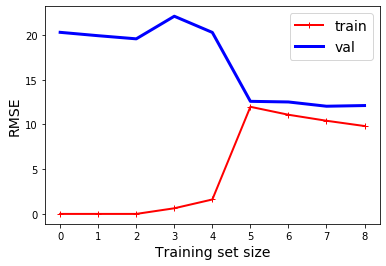

In [436]:
plot_learning_curves(lin_reg, X_train, y_train)

In [59]:
voting_pred = voting_reg.predict(X_test)
r2_score(y_test, voting_pred)


-0.15178827146916452

In [60]:
voting_mse = mean_squared_error(y_test, voting_pred)
voting_rmse = np.sqrt(voting_mse)
print(voting_rmse)

11.613414858332304


In [61]:
player_df = pd.DataFrame({'Actual': y_test, 'Predict': voting_pred}).reset_index()


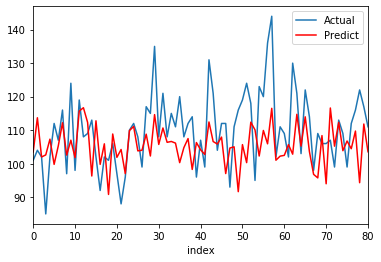

In [62]:
ax = plt.gca()

player_df.plot(kind='line', x='index', y='Actual', ax=ax)
player_df.plot(kind='line', x='index', y='Predict', color='red', ax=ax)


In [63]:
lin_pred = lin_reg.predict(X_test)
r2_score(y_test, lin_pred)

-0.2884941040617708

In [64]:
lin_mse = mean_squared_error(y_test, lin_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

12.283293588062907


In [65]:
player_df = pd.DataFrame({'Actual': y_test, 'Predict': lin_pred}).reset_index()


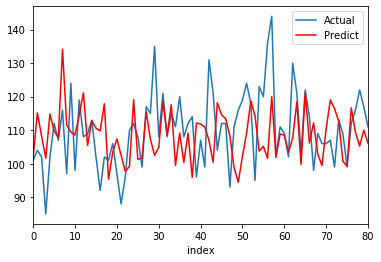

In [66]:
ax = plt.gca()

player_df.plot(kind='line', x='index', y='Actual', ax=ax)
player_df.plot(kind='line', x='index', y='Predict', color='red', ax=ax)


In [51]:
tree_pred = tree_reg.predict(X_test)
r2_score(y_test, tree_pred)

-0.39312896319872315

In [52]:

tree_mse = mean_squared_error(y_test, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

15.32583401054611

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [114.11475409836065,
  155.29508196721312,
  279.0983606557377,
  297.72131147540983,
  300.11475409836066,
  305.11475409836066,
  282.5409836065574,
  295.8524590163934,
  289.55737704918033])

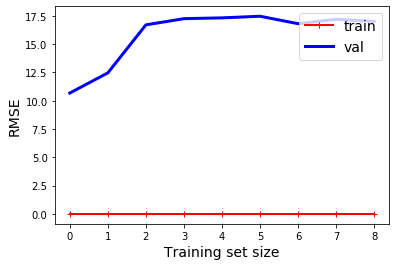

In [53]:
plot_learning_curves(tree_reg, X_train, y_train)

In [54]:
player_tree_df = pd.DataFrame({'Actual': y_test, 'Predict': tree_pred}).reset_index()


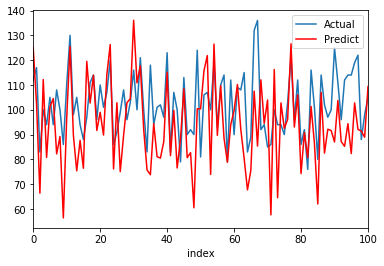

In [55]:
ax = plt.gca()

player_df.plot(kind='line', x='index', y='Actual', ax=ax)
player_df.plot(kind='line', x='index', y='Predict', color='red', ax=ax)

In [56]:
svm_pred = svm_reg.predict(X_test)
r2_score(y_test, svm_pred)

0.17534770361809549

In [57]:
svm_mse = mean_squared_error(y_test, svm_pred)
svm_rmse = np.sqrt(svm_mse)
svm_mse

139.03616698510822

([9927.471955079778,
  9277.093419159763,
  8224.364247689204,
  7319.522738486115,
  7831.299419992186,
  9096.474672066493,
  8732.420923207732,
  8638.226242973433,
  8407.24698318049],
 [10776.644219970229,
  10553.394573108942,
  10324.93146084264,
  10096.146545397392,
  9933.757135178508,
  9693.79207596344,
  9495.264896766063,
  9396.384377499826,
  9202.574684055196])

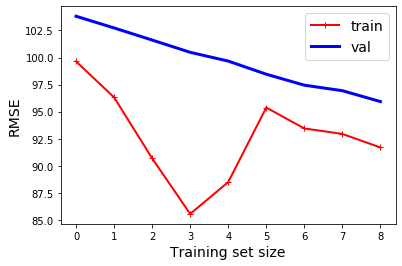

In [58]:
plot_learning_curves(svm_reg, X_train, y_train)

In [59]:
player_df = pd.DataFrame({'Actual': y_test, 'Predict': svm_pred}).reset_index()


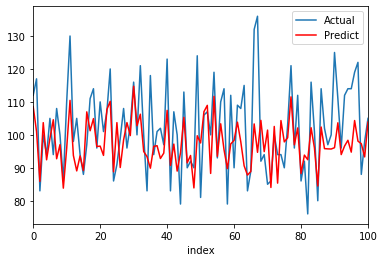

In [60]:
ax = plt.gca()

player_df.plot(kind='line', x='index', y='Actual', ax=ax)
player_df.plot(kind='line', x='index', y='Predict', color='red', ax=ax)

In [61]:


forest_pred = forest_reg.predict(X_test)
r2_score(y_test, forest_pred)

0.2560417561396513

In [62]:

forest_mse = mean_squared_error(y_test, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

11.199605809894816

([0.0,
  0.9280000000000025,
  8.092799999999995,
  6.182799999999997,
  5.407479999999996,
  92.77468333333331,
  64.08625714285714,
  49.4868875,
  65.54618888888886],
 [114.11475409836065,
  134.6214032786885,
  208.83276065573773,
  261.9744655737705,
  214.68187213114757,
  131.2082049180328,
  135.74744426229506,
  140.86492950819672,
  134.83189508196722])

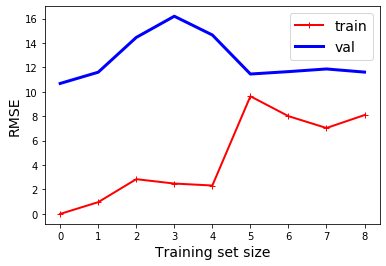

In [63]:
plot_learning_curves(forest_reg, X_train, y_train)

In [64]:
player_df = pd.DataFrame({'Actual': y_test, 'Predict': forest_pred}).reset_index()


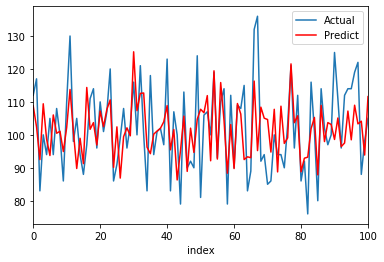

In [65]:
ax = plt.gca()

player_df.plot(kind='line', x='index', y='Actual', ax=ax)
player_df.plot(kind='line', x='index', y='Predict', color='red', ax=ax)

In [39]:
mlp_pred = mlp_reg.predict(X_test)
mlp_reg.score(X_test, y_test)


0.22243409385840085

In [40]:

mlp_mse = mean_squared_error(y_test, mlp_pred)
mlp_rmse = np.sqrt(mlp_mse)
mlp_rmse

11.449777883951693

C:\Users\ktung\Anaconda3\envs\PythonData\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ktung\Anaconda3\envs\PythonData\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ktung\Anaconda3\envs\PythonData\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ktung\Anaconda3\envs\PythonData\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached an

([0.001257892397097377,
  0.0041647471012768635,
  0.009340412727423204,
  0.6117720904205471,
  23.991175450790646,
  32.00841959701477,
  33.01841201619297,
  64.99009638899842,
  34.07422109619168],
 [6515.236956176807,
  1422.7986729347256,
  420.22730715994703,
  305.31182058830035,
  232.2790144687462,
  237.51801624998333,
  164.49182876100394,
  163.98842370934528,
  176.32349306021158])

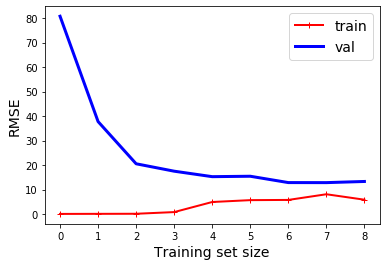

In [41]:
plot_learning_curves(mlp_reg, X_train, y_train)

In [42]:
player_df = pd.DataFrame({'Actual': y_test, 'Predict': mlp_pred}).reset_index()


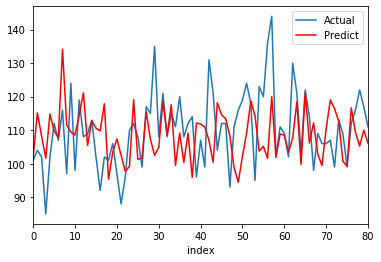

In [176]:
ax = plt.gca()

player_df.plot(kind='line', x='index', y='Actual', ax=ax)
player_df.plot(kind='line', x='index', y='Predict', color='red', ax=ax)

In [453]:
filename = 'LeBronJames_teamlog.model'

In [454]:
# joblib.dump(lin_reg, filename)
# joblib.dump(svm_reg, filename)
# joblib.dump(tree_reg, filename)
# joblib.dump(forest_reg, filename)
joblib.dump(mlp_reg, filename)
# joblib.dump(voting_reg, filename)

['LeBronJames_teamlog.model']

In [455]:
loaded = joblib.load('LeBronJames_teamlog.model')

In [456]:
loaded

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10,), learning_rate='constant',
             learning_rate_init=0.01, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [52]:
# lin_reg = LinearRegression()
# svm_reg = LinearSVR(random_state=42)
# tree_reg = DecisionTreeRegressor()
# forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)


In [53]:
               0        1
# 0          VictorOladipo_teamlog.model   203506
# 1      Karl_AnthonyTowns_teamlog.model  1626157
# 2            NikolaJokic_teamlog.model   203999
# 3            KyrieIrving_teamlog.model   202681
# 4              AlHorford_teamlog.model   201143
# 5          DamianLillard_teamlog.model   203081
# 6             RudyGobert_teamlog.model   203497
# 7          DraymondGreen_teamlog.model   203110
# 8           KawhiLeonard_teamlog.model   202695
# 9             PaulGeorge_teamlog.model   202331
# 10           JimmyButler_teamlog.model   202710
# 11            JoelEmbiid_teamlog.model   203954
# 12             ChrisPaul_teamlog.model   101108
# 13      RussellWestbrook_teamlog.model   201566
# 14  GiannisAntetokounmpo_teamlog.model   203507
# 15          AnthonyDavis_teamlog.model   203076
# 16           JamesHarden_teamlog.model   201935
# 17          StephenCurry_teamlog.model   201939
# 18           KevinDurant_teamlog.model   201142
# 19           LeBronJames_teamlog.model     2544

SyntaxError: invalid syntax (<ipython-input-53-3a1aec7ba941>, line 1)